<a href="https://colab.research.google.com/github/RodrigoZonzin/calculo_numerico/blob/main/modelagem/metodoSIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [154]:
maxIter = 300

Sns = []
Ins = []
Rns = []
Mns = []
Ilns = []
Rlns = []

N = 94056

Sns.append(N-1)
Ins.append(1)
Rns.append(0)
Mns.append(0)
Ilns.append(0)
Rlns.append(0)

alpha = 0.002525
beta = 1/12
h = 0.1
mu = 0.049

for t in range(1, maxIter):
    A1_corrente = A1(alpha, Sns[t-1], Ins[t-1], N, h)
    A2_corrente = A2(alpha, Sns[t-1], Ins[t-1], N, h, beta)
    A3_corrente = A3(alpha, Sns[t-1], Ins[t-1], N, h, beta)
    A4_corrente = A3(alpha, Sns[t-1], Ins[t-1], N, h, beta)

    B1_corrente = B1(alpha, Sns[t-1], Ins[t-1], beta, N)
    B2_corrente = B2(alpha, Sns[t-1], Ins[t-1], h, beta, N)
    B3_corrente = B3(alpha, Sns[t-1], Ins[t-1], h, beta, N)
    B4_corrente = B4(alpha, Sns[t-1], Ins[t-1], h, beta, N)

    C1_corrente = C1(beta, Ins[t-1])
    C2_corrente = C2(alpha, Sns[t-1], Ins[t-1], beta, h, N)
    C3_corrente = C3(alpha, Sns[t-1], Ins[t-1], beta, h, N)
    C4_corrente = C4(alpha, Sns[t-1], Ins[t-1], beta, h, N)


    #print("A",[A1_corrente, A2_corrente, A3_corrente, A4_corrente])
    #print("B", [B1_corrente, B2_corrente, B3_corrente, B4_corrente])
    #print("C", [C1_corrente, C2_corrente, C3_corrente, C4_corrente])
    #print("--"*30)



    Sns.append(Sn(Sns[t-1], h, A1_corrente, A2_corrente, A3_corrente, A4_corrente))
    Ins.append(In(Ins[t-1], h, B1_corrente, B2_corrente, B3_corrente, B4_corrente))
    Rns.append(Rn(Rns[t-1], h, C1_corrente, C2_corrente, C3_corrente, C4_corrente))


    var_Bl1 = Bl1(alpha, Sns[t-1], Ins[t-1], N, h, beta)
    var_Bl2 = Bl2(alpha, Sns[t-1], Ins[t-1], N, h, beta)
    var_Bl3 = Bl3(alpha, Sns[t-1], Ins[t-1], N, h, beta)
    var_Bl4 = Bl4(alpha, Sns[t-1], Ins[t-1], N, h, beta)

    var_Iln = Iln(h, var_Bl1, var_Bl2, var_Bl3, var_Bl4)
    var_Rln = Rln(h, C1_corrente, C2_corrente, C3_corrente, C4_corrente)

    Mns.append(Mn(mu, var_Iln))
    Ilns.append(var_Iln)
    Rlns.append(var_Rln)

    """print("S", Sns[t])
    print("I", Ins[t])
    print("R", Rns[t])
    print("-"*30)"""

In [155]:
f = open("resultados.csv", "w")
f.write("t,S(t),I(t),R(t),I_ativos(t),R_ativos(t),mortes(t)\n")
for t in range(len(Sns)):
    f.write(f"{t},{Sns[t]},{Ins[t]},{Rns[t]},{Ilns[t]},{Rlns[t]},{Mns[t]}\n")

f.close()

In [ ]:
def Sn(S_anterior, h, A1, A2, A3, A4):
    return (S_anterior + (h/6)*(A1+2*A2+2*A3+A4))

def In(I_anterior, h, B1, B2, B3, B4):
    return (I_anterior + (h/6)*(B1+2*B2+2*B3+B4))

def Rn(R_anterior, h, C1, C2, C3, C4):
    return (R_anterior + (h/6)*(C1+2*C2+2*C3+C4))

In [ ]:
def A1(alpha, S_anterior, I_anterior, N, h):
    return (-alpha)*(S_anterior*I_anterior/N)

def A2(alpha, S_anterior, I_anterior, N, h, beta):
    innerA1 = A1(alpha, S_anterior, I_anterior, N, h);
    innerB1 = B1(alpha, S_anterior, I_anterior, beta, N)

    return  (-alpha*(S_anterior+((innerA1*h)/2))*(I_anterior+((innerB1*h)/2)))/N

def A3(alpha, S_anterior, I_anterior, N, h, beta):
    innerA2 = A2(alpha, S_anterior, I_anterior, N, h, beta)
    innerB2 = B2(alpha, S_anterior, I_anterior, h, beta, N)

    return (-alpha*(S_anterior + (innerA2*h/2))*(I_anterior + (innerB2*h/2)))/N


def A4(alpha, S_anterior, I_anterior, N, h):
    innerA3 = A3(alpha, S_anterior, I_anterior, N, h)
    innerB3 = B3(alpha, S_anterior, I_anterior, h, beta, N)

    return (-alpha*(S_anterior + (innerA3*h/2))*(I_anterior + (innerB3*h/2)))/N

In [ ]:
def B1(alpha, S_anterior, I_anterior, beta, N):
    return ((alpha*S_anterior*I_anterior/N)-beta*I_anterior)

def B2(alpha, S_anterior, I_anterior, h, beta, N):
    innerA1 = A1(alpha, S_anterior, I_anterior, N, h)
    innerB1 = B1(alpha, S_anterior, I_anterior, beta, N)

    return ((alpha*(S_anterior+(innerA1*h/2)) * (I_anterior + (innerB1*h/2)))/N - (beta*(I_anterior+(innerB1*h/2))))

def B3(alpha, S_anterior, I_anterior, h, beta, N):
    innerA2 =A2(alpha, S_anterior, I_anterior, N, h, beta)
    innerB2 = B2(alpha, S_anterior, I_anterior, h, beta, N)

    return ((alpha*(S_anterior+(innerA2*h/2)) * (I_anterior + (innerB2*h/2)))/N - (beta*(I_anterior+(innerB2*h/2))))

def B4(alpha, S_anterior, I_anterior, h, beta, N):
    innerA3 =A3(alpha, S_anterior, I_anterior, N, h, beta)
    innerB3 = B3(alpha, S_anterior, I_anterior, h, beta, N)

    return ((alpha*(S_anterior+(innerA3*h/2)) * (I_anterior + (innerB3*h/2)))/N - (beta*(I_anterior+(innerB3*h/2))))

In [ ]:
def C1(beta, I_anterior):
    return beta*I_anterior

def C2(alpha, S_anterior, I_anterior, beta, h, N):
    innerB1 = B1(alpha, S_anterior, I_anterior, beta, N)

    return beta*(I_anterior+(innerB1*h/2))

def C3(alpha, S_anterior, I_anterior, h, beta, N):
    innerB2 = B2(alpha, S_anterior, I_anterior, h, beta, N)

    return beta*(I_anterior+(innerB2*h/2))

def C4(alpha, S_anterior, I_anterior, h, beta, N):
    innerB3 = B3(alpha, S_anterior, I_anterior, h, beta, N)

    return beta*(I_anterior + innerB3*h)



In [ ]:
def Iln(h, var_Bl1, var_Bl2, var_Bl23, var_Bl4):
  return ((h/6)*(var_Bl1+2*var_Bl2+2*var_Bl3+var_Bl4))

def Rln(h, C1, C2, C3, C4):
  return (h/6*(C1+2*C2+2*C3+C4))

def Bl1(alpha, S_anterior, I_anterior, N, h, beta):
  return (alpha*S_anterior*I_anterior)/N

def Bl2(alpha, S_anterior, I_anterior, N, h, beta):
  innerA1 = A1(alpha, S_anterior, I_anterior, N, h)
  innerB1 = B1(alpha, S_anterior, I_anterior, beta, N)
  return ((alpha*(S_anterior+(innerA1*h/2)*(I_anterior+(innerB1*h/2))))/N)

def Bl3(alpha, S_anterior, I_anterior, N, h, beta):
  innerA2 = A2(alpha, S_anterior, I_anterior, N, h, beta)
  innerB2 = B2(alpha, S_anterior, I_anterior, h, beta, N)
  return ((alpha*(S_anterior+(innerA2*h/2)*(I_anterior+(innerB2*h/2))))/N)

def Bl4(alpha, S_anterior, I_anterior, N, h, beta):
  innerA3 =A3(alpha, S_anterior, I_anterior, N, h, beta)
  innerB3 = B3(alpha, S_anterior, I_anterior, h, beta, N)

  return ((alpha*(S_anterior+innerA3*h)*(I_anterior+innerB3*h))/N)

In [ ]:
def Mn(mu, In):
  return (mu*In)

In [ ]:
import pandas as pd

In [156]:
dados = pd.read_csv('resultados.csv')

In [157]:
dados

,t,S(t),I(t),R(t),I_ativos(t),R_ativos(t),mortes(t)
0,0,94055.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,1,94054.999748,0.991946,0.009128,0.000252,0.009128,0.000012
2,2,94054.999499,0.983957,0.018183,0.000251,0.009055,0.000012
3,3,94054.999251,0.976033,0.027165,0.000251,0.008982,0.000012
4,4,94054.999005,0.968172,0.036075,0.000250,0.008910,0.000012
...,...,...,...,...,...,...,...
295,295,94054.971630,0.092047,1.029122,0.000176,0.000847,0.000009
296,296,94054.971607,0.091305,1.029962,0.000176,0.000840,0.000009
297,297,94054.971584,0.090570,1.030795,0.000176,0.000833,0.000009
298,298,94054.971561,0.089841,1.031622,0.000176,0.000827,0.000009


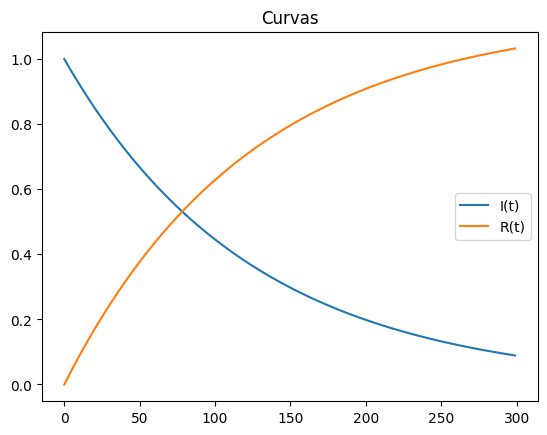

In [158]:
#plt.plot(dados['ds/dt(t)'])
#plt.plot(dados['S(t)'], label = "S(t)")
plt.plot(dados['I(t)'], label = "I(t)")
plt.plot(dados['R(t)'], label = "R(t)")

plt.title("Curvas")

plt.legend()
plt.show()